In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/IIIT_B/ML/ML Project 2/Binary/'

/content/drive/My Drive/IIIT_B/ML/ML Project 2/Binary


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from scipy import stats
import warnings

In [5]:
df = pd.read_csv('train_dataset.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

### Dataset observations

In [7]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,38984.0,44.127591,12.063564,20.0,40.0,40.0,55.0,85.0
height(cm),38984.0,164.689488,9.187507,130.0,160.0,165.0,170.0,190.0
weight(kg),38984.0,65.938718,12.896581,30.0,55.0,65.0,75.0,135.0
waist(cm),38984.0,82.062115,9.326798,51.0,76.0,82.0,88.0,129.0
eyesight(left),38984.0,1.014955,0.498527,0.1,0.8,1.0,1.2,9.9
eyesight(right),38984.0,1.008768,0.493813,0.1,0.8,1.0,1.2,9.9
hearing(left),38984.0,1.025369,0.157246,1.0,1.0,1.0,1.0,2.0
hearing(right),38984.0,1.026190,0.159703,1.0,1.0,1.0,1.0,2.0
systolic,38984.0,121.475631,13.643521,71.0,112.0,120.0,130.0,233.0
relaxation,38984.0,75.994408,9.658734,40.0,70.0,76.0,82.0,146.0


In [8]:
print(f"\nMissing Values:\n{df.isnull().sum()}")


Missing Values:
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64


In [9]:
# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")


Number of duplicates: 5517


In [10]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")

print("Dataset Shape:", df.shape)
print("\nTarget Variable Distribution:")
print(df['smoking'].value_counts())

Dataset Shape: (38984, 23)

Target Variable Distribution:
smoking
0    24666
1    14318
Name: count, dtype: int64


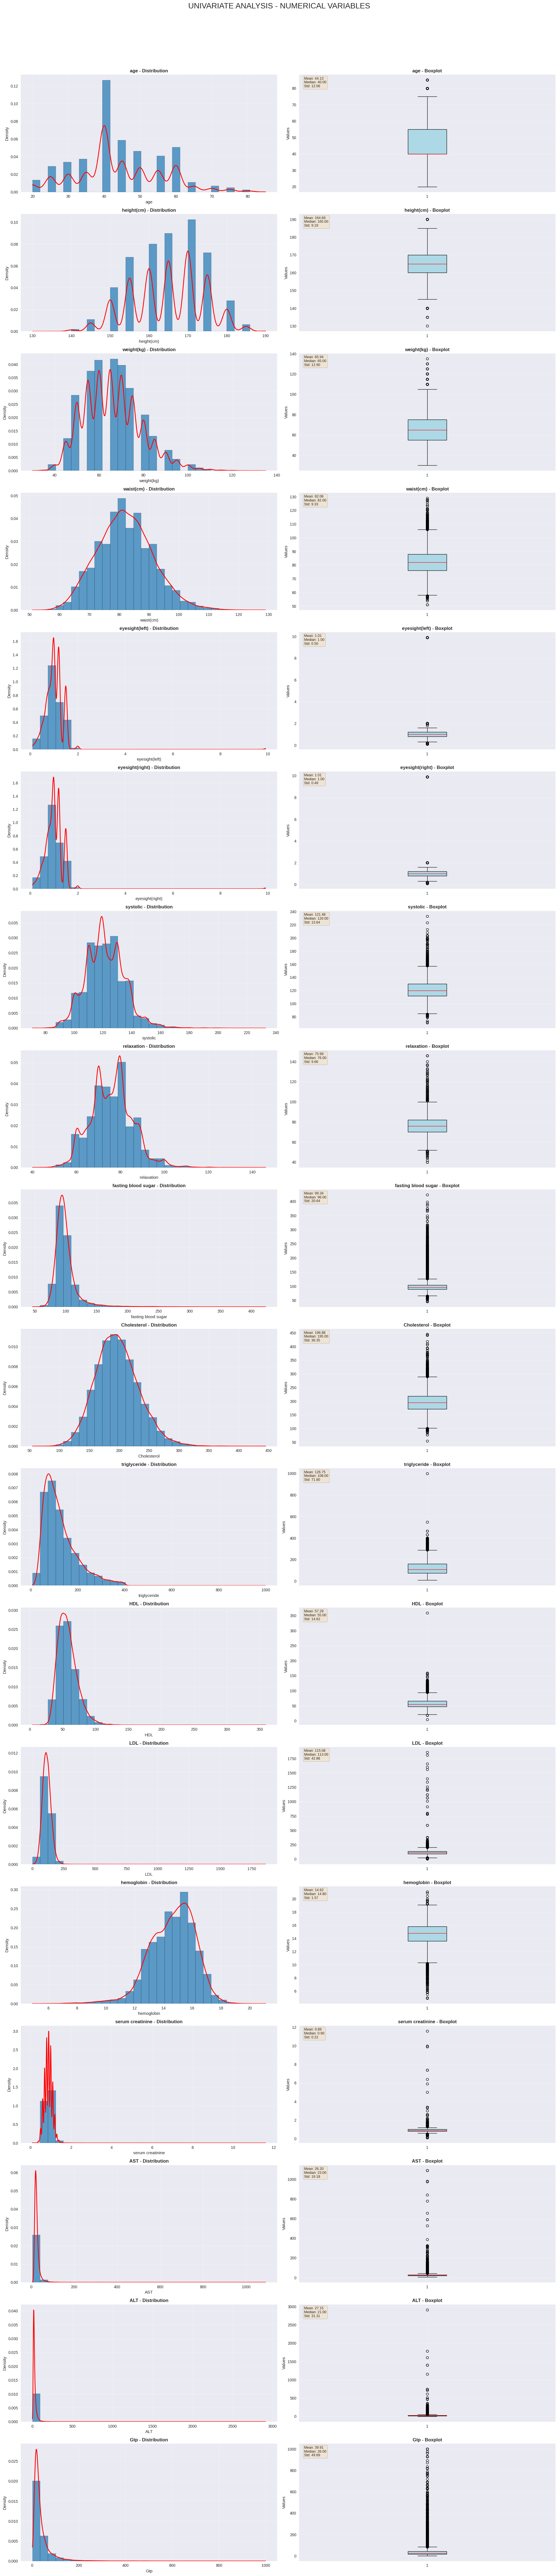

In [12]:
# UNIVARIATE ANALYSIS - NUMERICAL VARIABLES
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']

# Remove categorical columns from numerical list (they're encoded as numbers but are categorical)
for cat_col in categorical_cols:
    if cat_col in numerical_cols:
        numerical_cols.remove(cat_col)


# Create a figure for all numerical variables (histograms and boxplots)
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(20, 5*len(numerical_cols)))
fig.suptitle('UNIVARIATE ANALYSIS - NUMERICAL VARIABLES', fontsize=20, y=1.02)

for idx, col in enumerate(numerical_cols):
    # Histogram with KDE
    axes[idx, 0].hist(df[col], bins=30, edgecolor='black', alpha=0.7, density=True)

    # Add KDE curve
    from scipy.stats import gaussian_kde
    try:
        kde = gaussian_kde(df[col].dropna())
        x_vals = np.linspace(df[col].min(), df[col].max(), 1000)
        axes[idx, 0].plot(x_vals, kde(x_vals), color='red', linewidth=2)
    except:
        pass

    axes[idx, 0].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Density')
    axes[idx, 0].grid(True, alpha=0.3)

    # Boxplot
    bp = axes[idx, 1].boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set_color('red')
    axes[idx, 1].set_title(f'{col} - Boxplot', fontsize=12, fontweight='bold')
    axes[idx, 1].set_ylabel('Values')
    axes[idx, 1].grid(True, alpha=0.3)

    # Add statistics on boxplot
    stats_text = f"Mean: {df[col].mean():.2f}\nMedian: {df[col].median():.2f}\nStd: {df[col].std():.2f}"
    axes[idx, 1].text(0.02, 0.98, stats_text, transform=axes[idx, 1].transAxes,
                     verticalalignment='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

CATEGORICAL VARIABLES ANALYSIS...


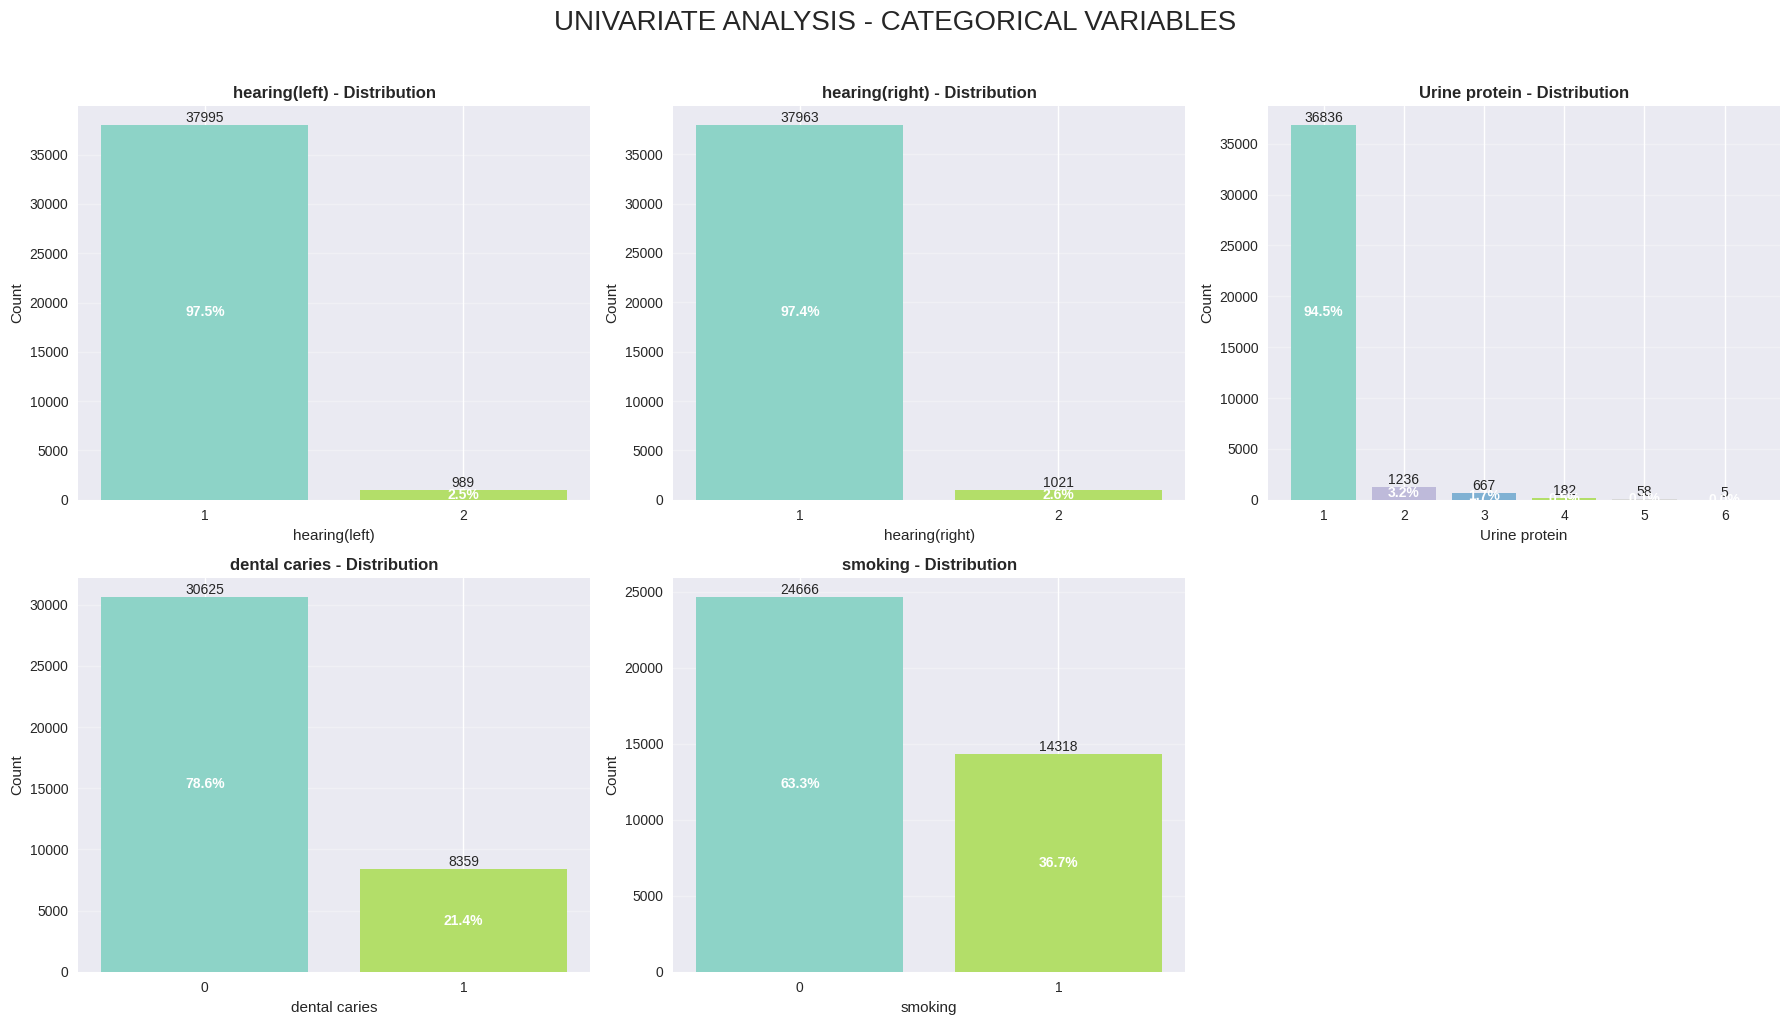

In [13]:
print("CATEGORICAL VARIABLES ANALYSIS...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
fig.suptitle('UNIVARIATE ANALYSIS - CATEGORICAL VARIABLES', fontsize=20, y=1.02)

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        # Bar plot
        value_counts = df[col].value_counts().sort_index()
        bars = axes[idx].bar(value_counts.index.astype(str), value_counts.values,
                           color=plt.cm.Set3(np.arange(len(value_counts))/len(value_counts)))

        # Add count labels on bars
        for bar, count in zip(bars, value_counts.values):
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                         f'{count}', ha='center', va='bottom', fontsize=10)

        axes[idx].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].grid(True, alpha=0.3, axis='y')

        # Add percentage labels
        total = len(df[col])
        percentages = [(count/total)*100 for count in value_counts.values]
        for i, (bar, pct) in enumerate(zip(bars, percentages)):
            axes[idx].text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                         f'{pct:.1f}%', ha='center', va='center', color='white', fontweight='bold')

# Remove empty subplot if needed
if len(categorical_cols) < len(axes):
    for idx in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

CREATING INDIVIDUAL DETAILED PLOTS FOR KEY VARIABLES...


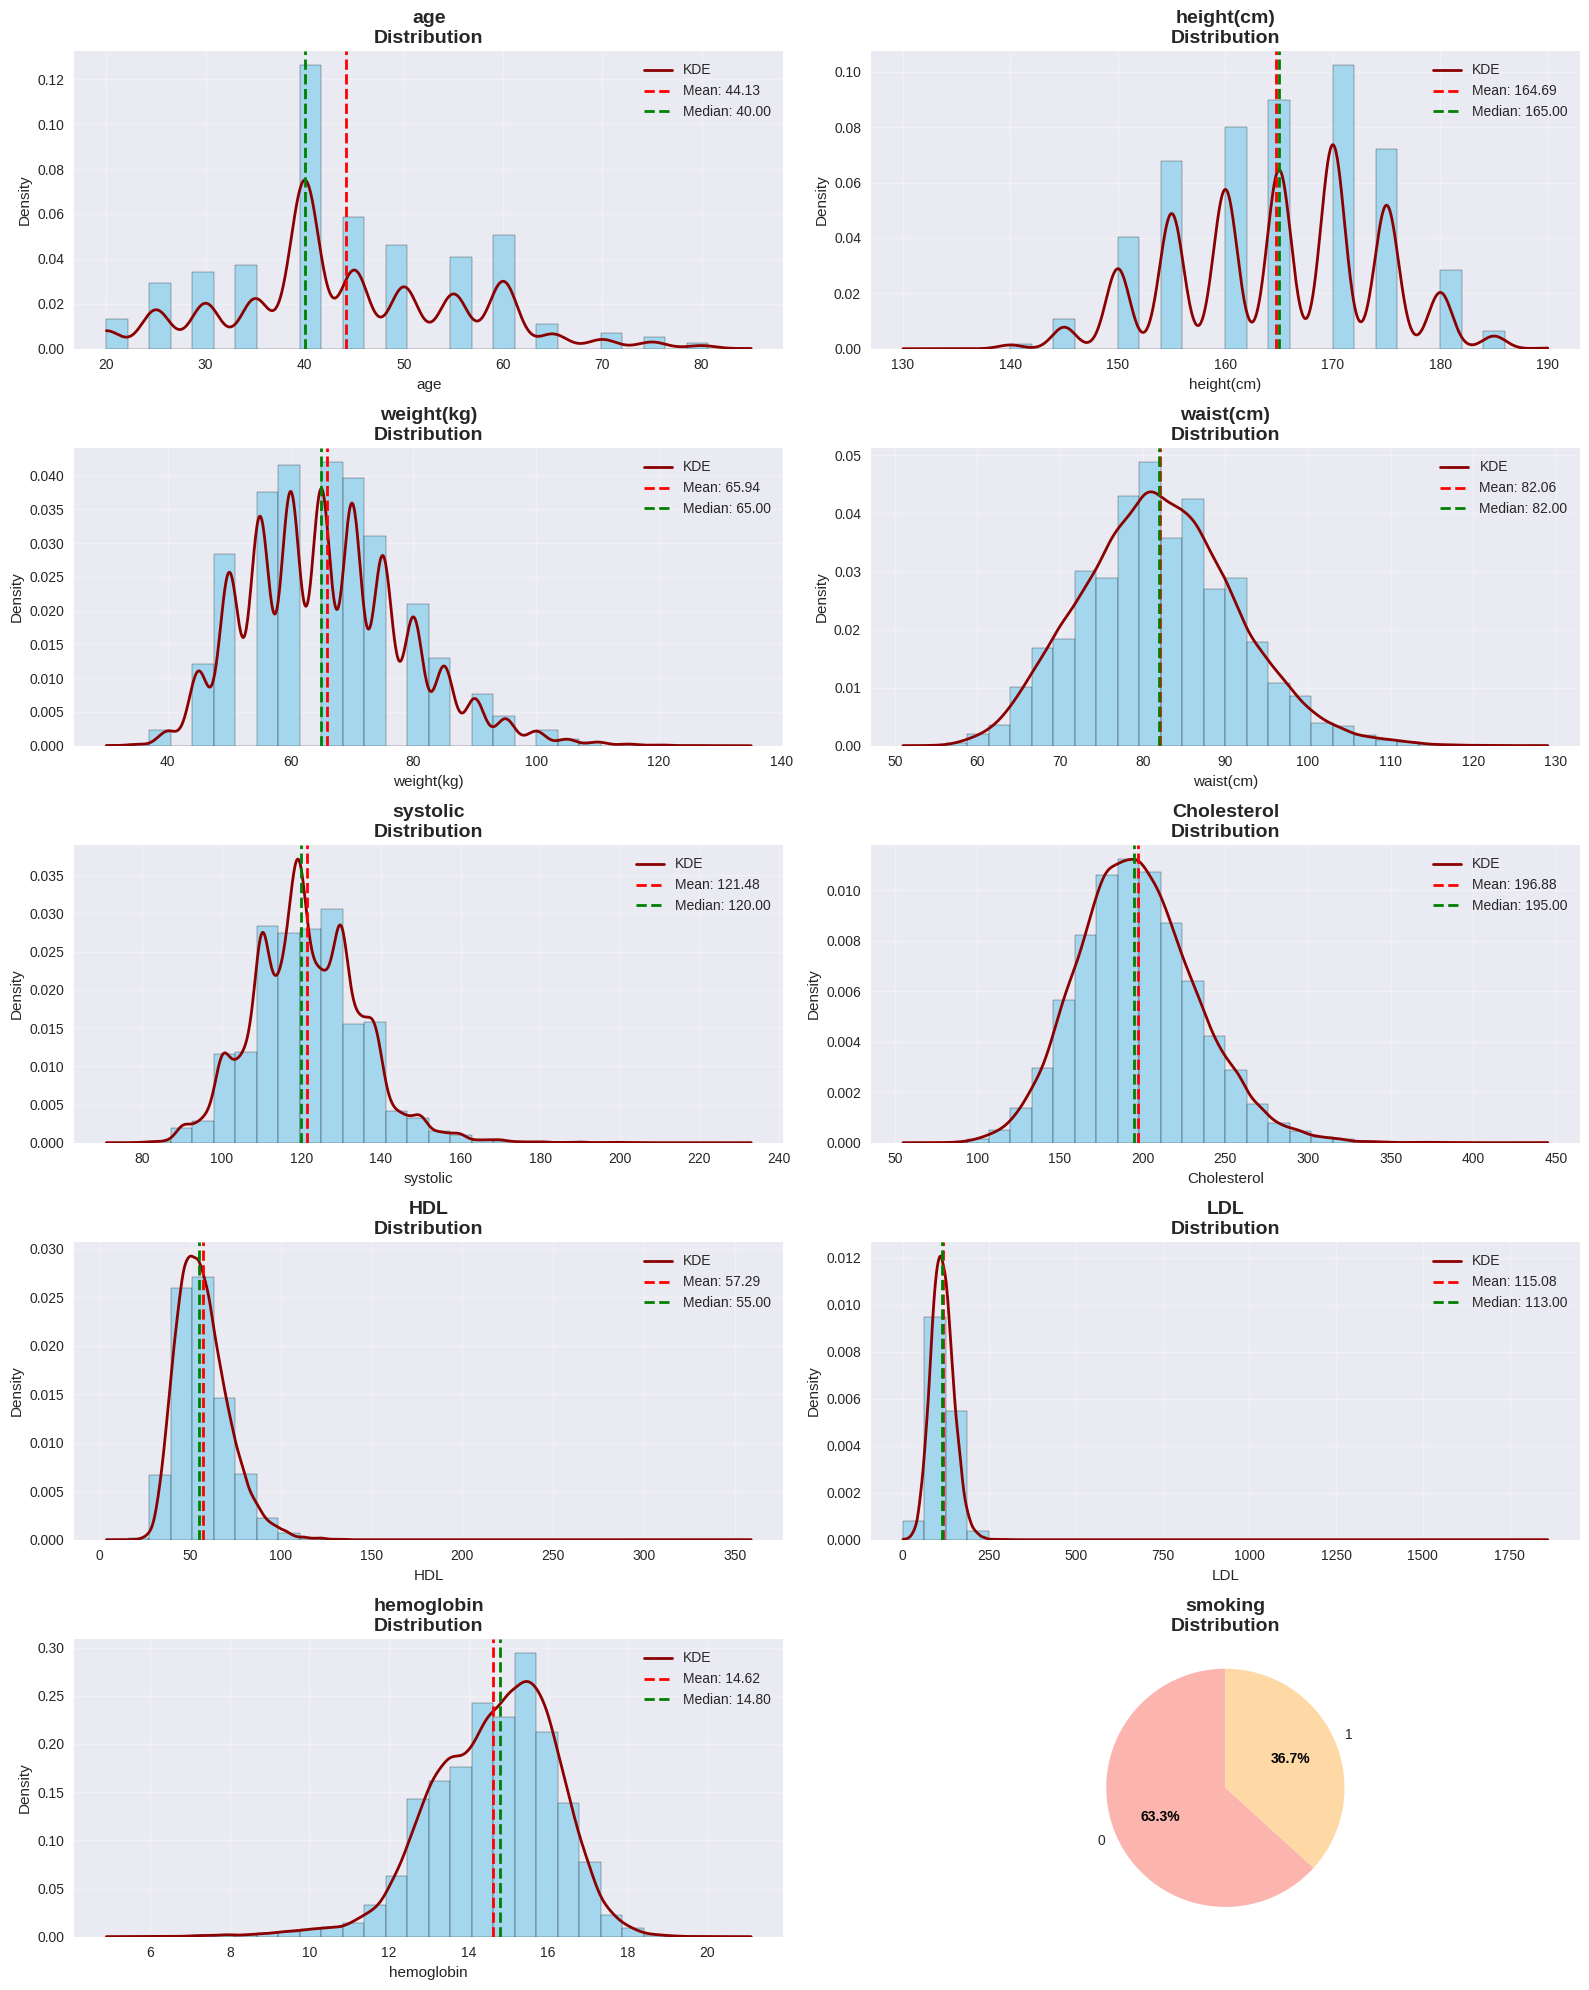

In [14]:
# 6. CREATE INDIVIDUAL PLOTS FOR KEY VARIABLES
print("CREATING INDIVIDUAL DETAILED PLOTS FOR KEY VARIABLES...")
key_variables = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
                 'systolic',
                 'Cholesterol', 'HDL', 'LDL','hemoglobin',
                 'smoking']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, col in enumerate(key_variables):
    if col in df.columns:
        if col in categorical_cols:
            # For categorical key variables
            value_counts = df[col].value_counts().sort_index()
            wedges, texts, autotexts = axes[idx].pie(value_counts.values,
                                                    labels=value_counts.index.astype(str),
                                                    autopct='%1.1f%%',
                                                    startangle=90,
                                                    colors=plt.cm.Pastel1(np.arange(len(value_counts))/len(value_counts)))
            axes[idx].set_title(f'{col}\nDistribution', fontsize=14, fontweight='bold')

            # Make percentage labels bold
            for autotext in autotexts:
                autotext.set_color('black')
                autotext.set_fontweight('bold')
        else:
            # For numerical key variables
            # Histogram with KDE
            axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, density=True, color='skyblue')

            # Add KDE
            try:
                kde = gaussian_kde(df[col].dropna())
                x_vals = np.linspace(df[col].min(), df[col].max(), 1000)
                axes[idx].plot(x_vals, kde(x_vals), color='darkred', linewidth=2, label='KDE')
            except:
                pass

            # Add mean and median lines
            axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
            axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')

            axes[idx].set_title(f'{col}\nDistribution', fontsize=14, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
            axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


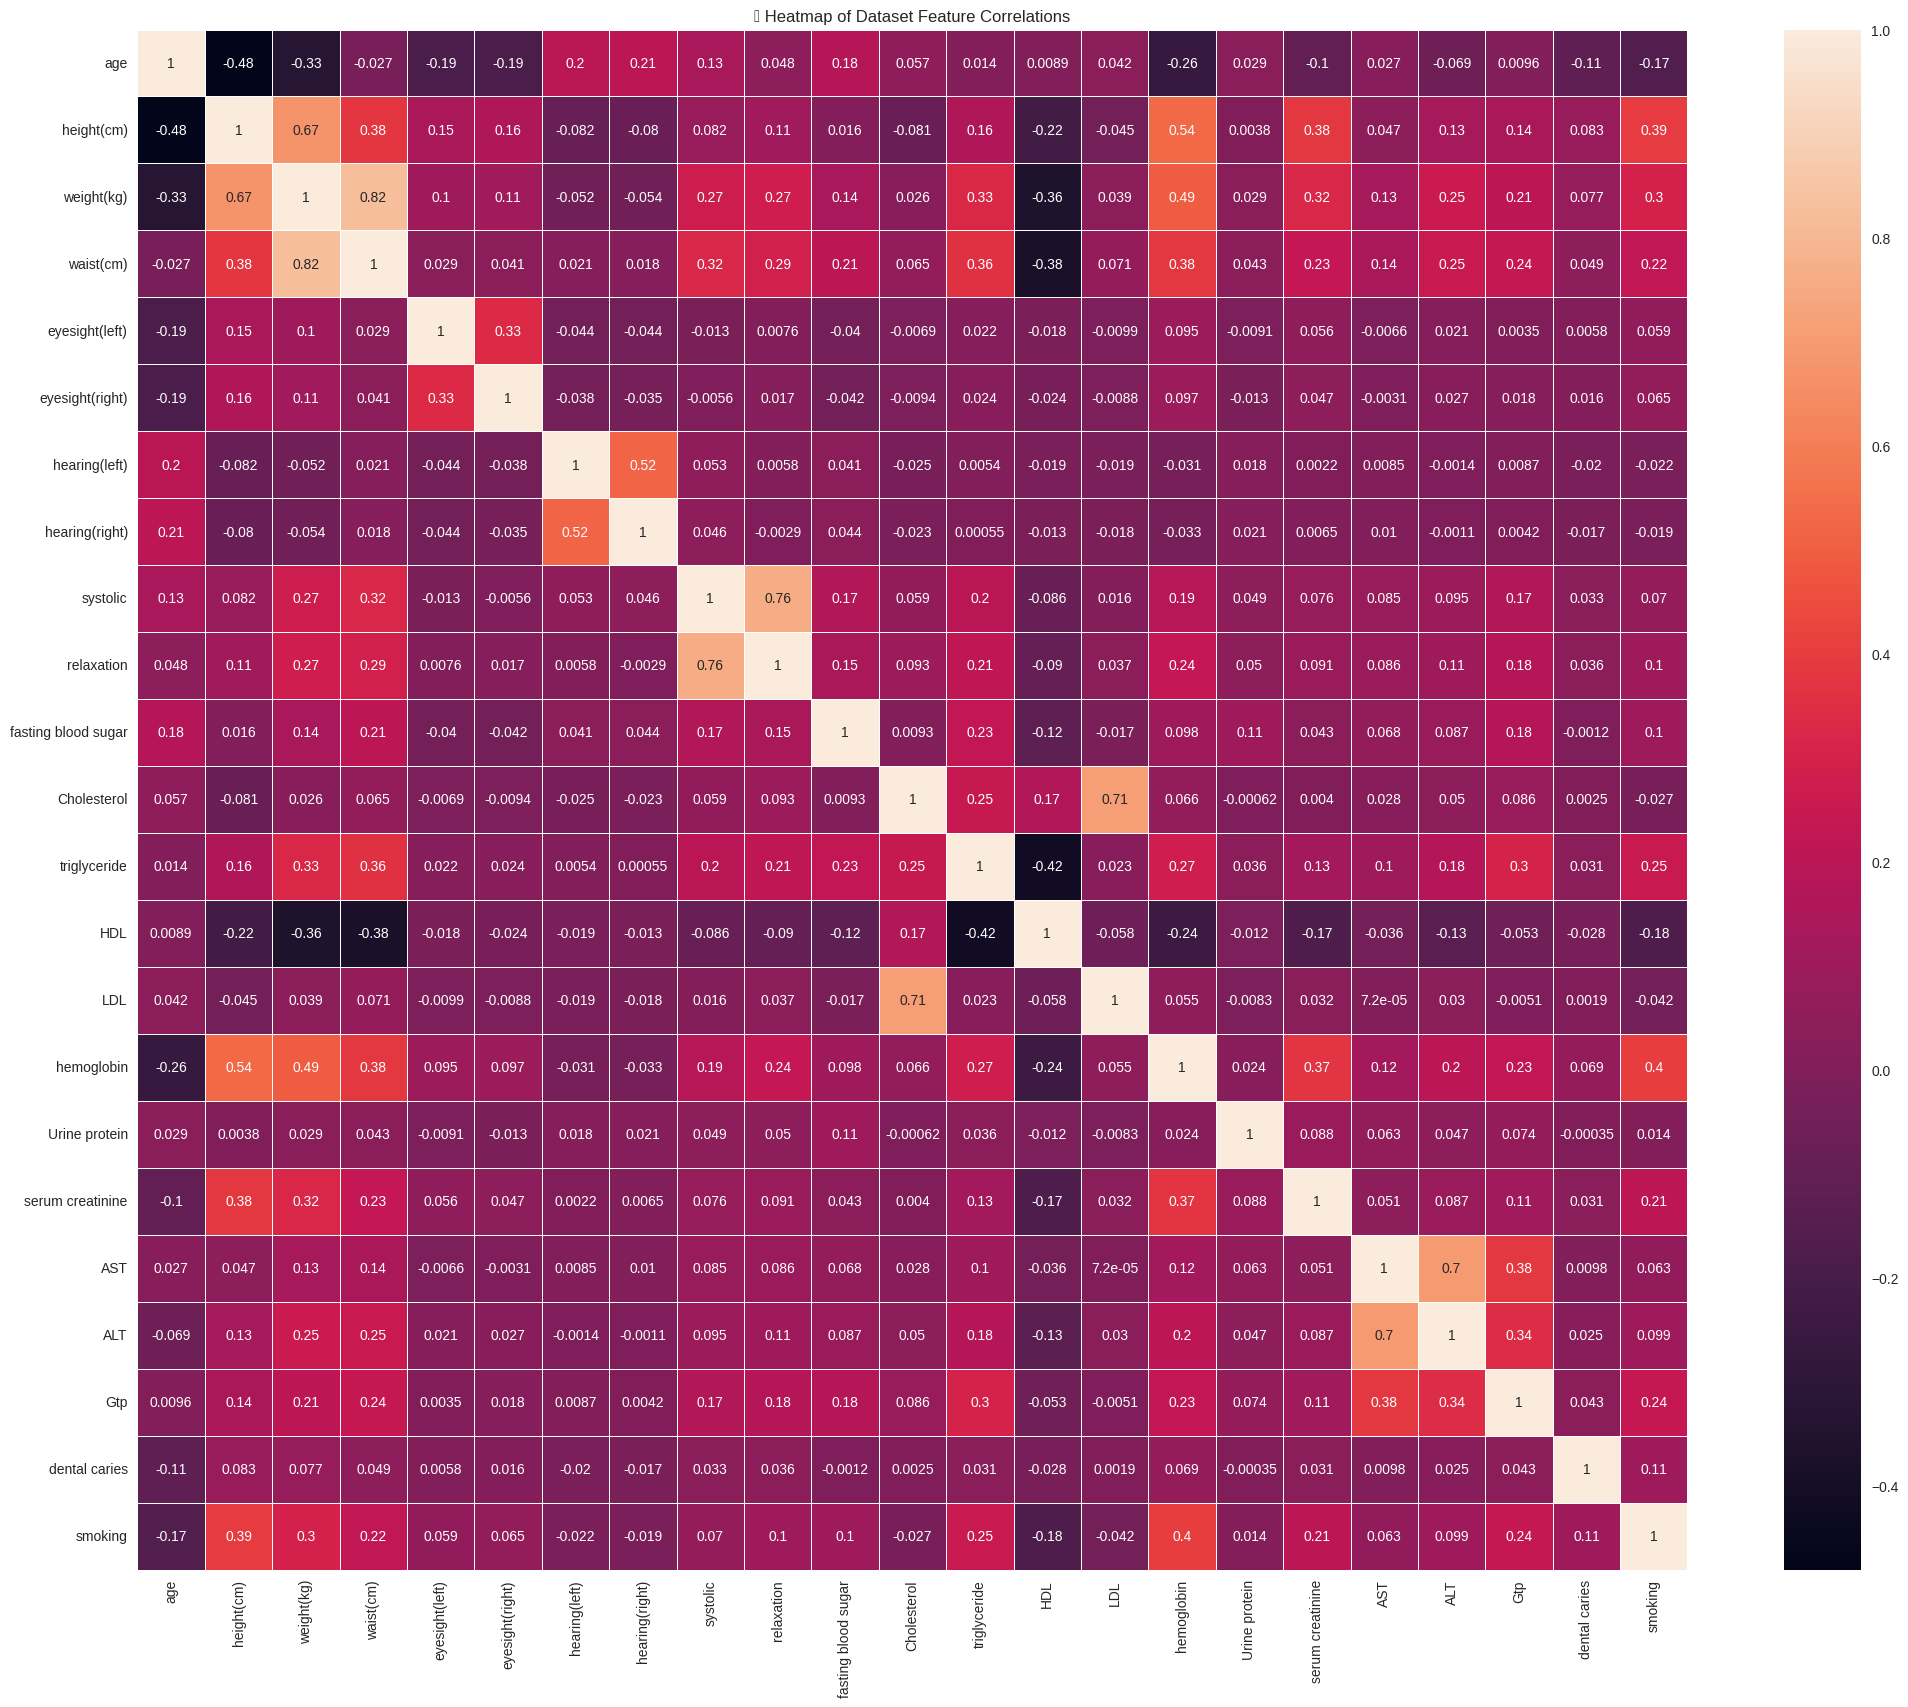

In [15]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('🔶 Heatmap of Dataset Feature Correlations')
plt.show()

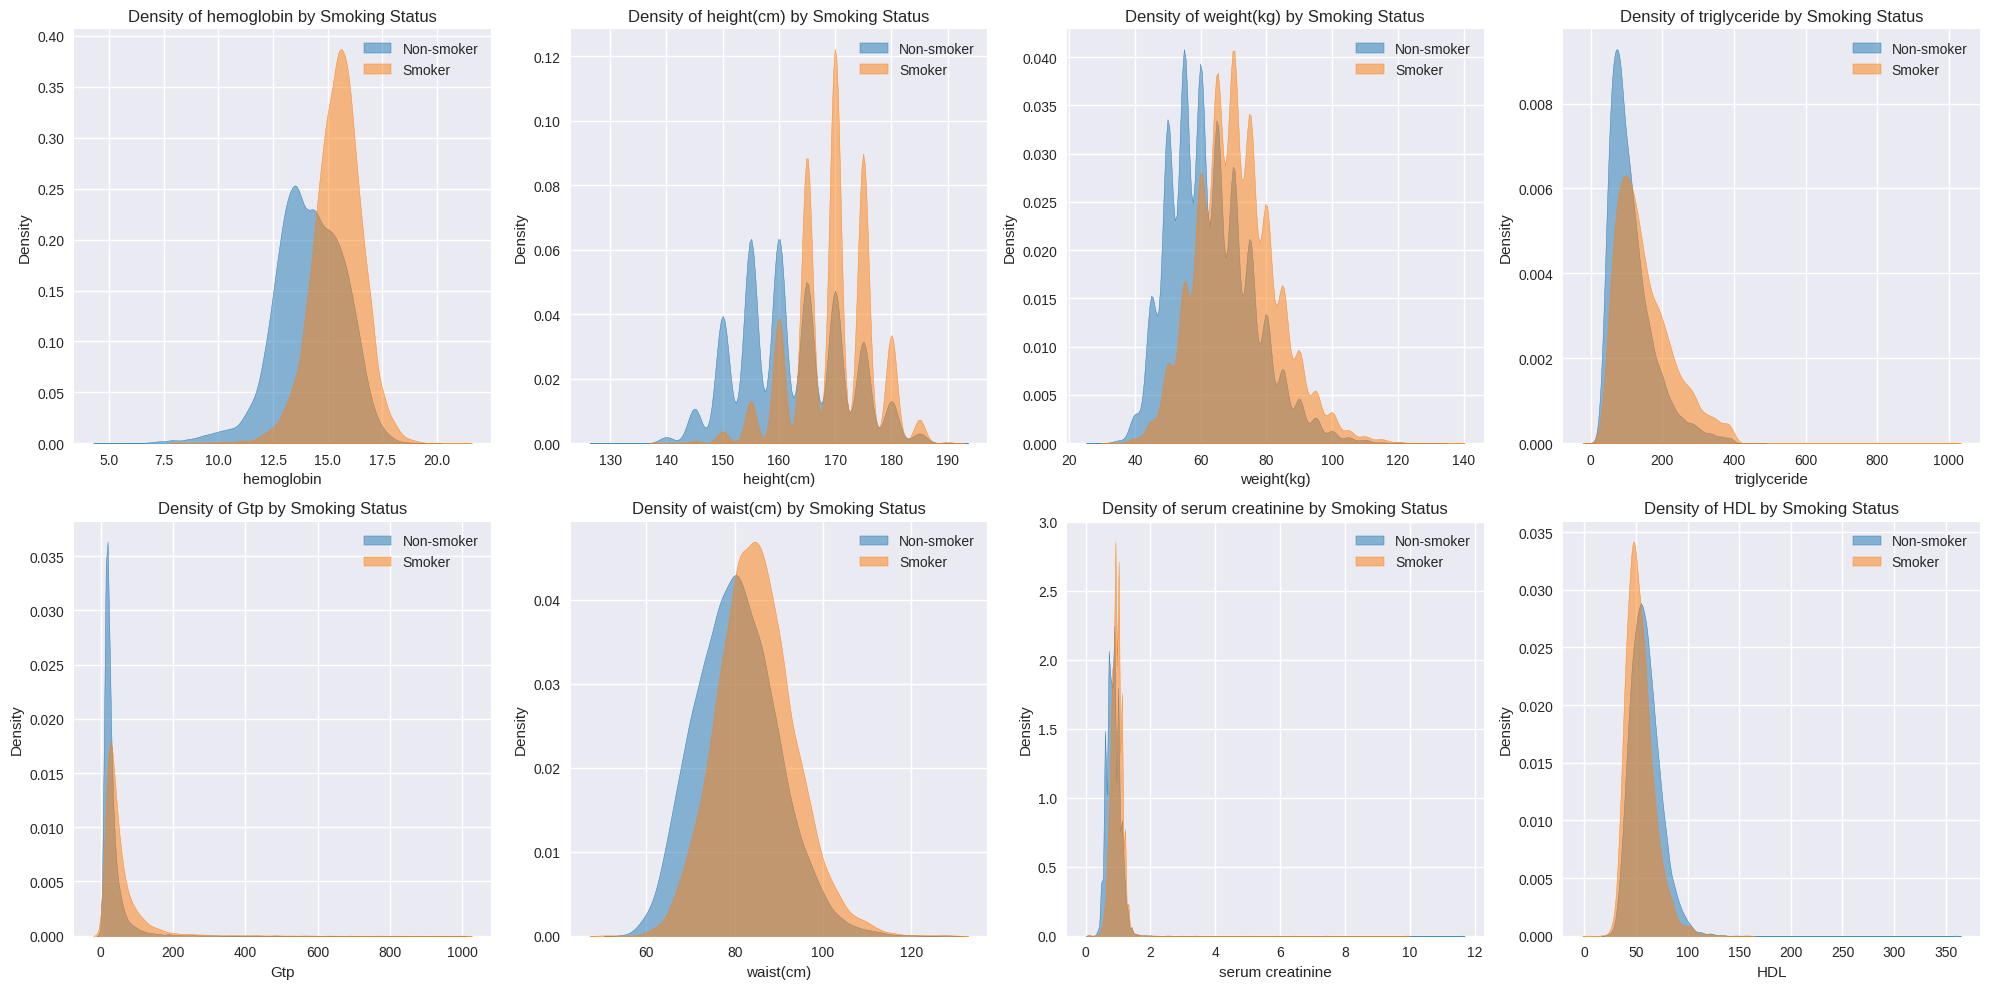

In [18]:
correlations = df.corr()['smoking'].sort_values(ascending=False)
top_features = correlations.drop('smoking').abs().nlargest(8).index.tolist()

# Density plots for top features by smoking status
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    if i < len(axes):
        sns.kdeplot(data=df[df['smoking'] == 0], x=feature, label='Non-smoker', ax=axes[i], fill=True, alpha=0.5)
        sns.kdeplot(data=df[df['smoking'] == 1], x=feature, label='Smoker', ax=axes[i], fill=True, alpha=0.5)
        axes[i].set_title(f'Density of {feature} by Smoking Status')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()

plt.tight_layout()
plt.show()


### Model Training

In [19]:
# Complete ML pipeline: preprocessing (duplicates, missing, outliers replaced with median, correlation),
# PCA, and models (Logistic, SVM, MLPs with 2,3,5,7 layers).
# Evaluates using ACCURACY (primary) on val and test sets (80/10/10 split).
# Includes RandomOverSampler on TRAIN ONLY.
# ---------------------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

RANDOM_STATE = 84

In [20]:
def remove_duplicates(df):
    before = df.shape[0]
    df2 = df.drop_duplicates()
    print(f"Removed duplicates: {before - df2.shape[0]} rows")
    return df2

In [21]:
def stratified_split_801010(X, y, random_state=RANDOM_STATE):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=random_state
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=random_state
    )
    return (
        X_train.reset_index(drop=True),
        X_val.reset_index(drop=True),
        X_test.reset_index(drop=True),
        y_train.reset_index(drop=True),
        y_val.reset_index(drop=True),
        y_test.reset_index(drop=True)
    )

In [22]:
def fill_numeric_median(df, numeric_cols, medians):
    df = df.copy()
    for c in numeric_cols:
        df[c] = df[c].fillna(medians[c])
    return df

In [23]:
def replace_outliers_with_median(df, numeric_cols, factor=3):
    df = df.copy()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        median = df[col].median()

        df.loc[~df[col].between(lower, upper), col] = median
    return df

In [24]:
def remove_highly_correlated_features_train(df_train, numeric_cols, threshold=0.90):
    corr = df_train[numeric_cols].corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    return to_drop

In [25]:
DATA_PATH = "train_dataset.csv"
df = pd.read_csv(DATA_PATH)
print("Initial shape:", df.shape)

TARGET = "smoking"

Initial shape: (38984, 23)


In [26]:
# Remove duplicates
df = remove_duplicates(df)

Removed duplicates: 5517 rows


In [27]:
y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET]).reset_index(drop=True)
y = y.reset_index(drop=True)

In [28]:
X_train, X_val, X_test, y_train, y_val, y_test = stratified_split_801010(X, y)
print("Train/Val/Test:", X_train.shape, X_val.shape, X_test.shape)

Train/Val/Test: (26773, 22) (3347, 22) (3347, 22)


In [29]:
numeric_cols = X_train.columns.tolist()
medians = X_train[numeric_cols].median()
X_train_filled = fill_numeric_median(X_train, numeric_cols, medians)
X_train = replace_outliers_with_median(X_train_filled, numeric_cols)
print("Outliers replaced with column medians.")

Outliers replaced with column medians.


In [30]:
to_drop = remove_highly_correlated_features_train(X_train, numeric_cols, threshold=0.75)
print("Dropped correlated columns:", to_drop)

X_train = X_train.drop(columns=to_drop, errors='ignore')
X_val = X_val.drop(columns=to_drop, errors='ignore')
X_test = X_test.drop(columns=to_drop, errors='ignore')

numeric_cols = X_train.columns.tolist()

Dropped correlated columns: ['waist(cm)', 'relaxation', 'LDL']


In [31]:
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_cols)
], remainder='drop')

In [32]:
pca = PCA(n_components=0.95, random_state=RANDOM_STATE)

In [33]:
def make_pipeline(clf):
    return Pipeline([
        ('preproc', preprocessor),
        # ('pca', pca),
        ('clf', clf)
    ])

In [34]:
models = {
    "LogisticRegression": make_pipeline(
        LogisticRegression(max_iter=2000, random_state=RANDOM_STATE, class_weight='balanced')
    ),
    "SVM_RBF": make_pipeline(
        SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE, class_weight='balanced')
    ),
    "MLP_2layers": make_pipeline(
        MLPClassifier(hidden_layer_sizes=(64,32), max_iter=2000, random_state=RANDOM_STATE, early_stopping=True)
    ),
    "MLP_3layers": make_pipeline(
        MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=2000, random_state=RANDOM_STATE, early_stopping=True)
    ),
    "MLP_5layers": make_pipeline(
        MLPClassifier(hidden_layer_sizes=(256,128,64,32,16), max_iter=2000, random_state=RANDOM_STATE, early_stopping=True)
    ),
    "MLP_7layers": make_pipeline(
        MLPClassifier(hidden_layer_sizes=(512,256,128,64,32,16,8), max_iter=2000, random_state=RANDOM_STATE, early_stopping=True)
    )
}

In [35]:
results = []

for name, pipe in models.items():
    print("\n" + "="*60)
    print(f"Training model: {name}")

    pipe.fit(X_train, y_train)

    # Validation
    val_pred = pipe.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f"[VAL] Accuracy = {val_acc:.4f}")

    # Test
    test_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"[TEST] Accuracy = {test_acc:.4f}")

    print("Classification Report (TEST):")
    print(classification_report(y_test, test_pred, zero_division=0))

    results.append([name, val_acc, test_acc])


Training model: LogisticRegression
[VAL] Accuracy = 0.7126
[TEST] Accuracy = 0.7239
Classification Report (TEST):
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      2121
           1       0.59      0.80      0.68      1226

    accuracy                           0.72      3347
   macro avg       0.72      0.74      0.72      3347
weighted avg       0.76      0.72      0.73      3347


Training model: SVM_RBF
[VAL] Accuracy = 0.6908
[TEST] Accuracy = 0.6950
Classification Report (TEST):
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      2121
           1       0.55      0.92      0.69      1226

    accuracy                           0.69      3347
   macro avg       0.74      0.74      0.69      3347
weighted avg       0.79      0.69      0.70      3347


Training model: MLP_2layers
[VAL] Accuracy = 0.7308
[TEST] Accuracy = 0.7550
Classification Report (TEST):
              preci

In [36]:
summary = pd.DataFrame(results, columns=["Model","Val Accuracy","Test Accuracy"])
summary = summary.sort_values("Test Accuracy", ascending=False)
print("\nFinal Model Comparison:\n", summary)


Final Model Comparison:
                 Model  Val Accuracy  Test Accuracy
4         MLP_5layers      0.746938       0.762175
3         MLP_3layers      0.737377       0.757096
2         MLP_2layers      0.730804       0.755004
5         MLP_7layers      0.732895       0.749627
0  LogisticRegression      0.712578       0.723932
1             SVM_RBF      0.690768       0.694951
